In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sp
import scipy.interpolate as itp

In [2]:
#Q1 Diff method codes
def forward_difference(func,x,h):
    f_prime = (func(x+h).astype('float32') - func(x).astype('float32'))/h
    return f_prime 

def central_difference(func,x,h):
    f_prime = ((func(x+h).astype('float32') - func(x-h).astype('float32'))/(2*h))
    return f_prime 

def extrapolation_method(func,x,h):
    f_prime = ((-func(x+2*h).astype('float32')+8*func(x+h).astype('float32')-8*func(x-h).astype('float32')+func(x-2*h).astype('float32'))/(12*h))
    return f_prime
    
    
    

In [3]:
#Generate e for Q1 cos func
ans = -np.sin(0.1).astype('float32')
e_1 = []
e_2 = []
e_3 = []
h_p = []
for i in range(0,20):
    h = np.float32(1/(2**i))
    #h= h.astype('float32')
    h_p.append(h)
    a1 = forward_difference(np.cos,0.1,h)
    a2 = central_difference(np.cos,0.1,h)
    a3 = extrapolation_method(np.cos,0.1,h)
    e_1.append(np.abs(ans-a1))
    e_2.append(np.abs(ans-a2))
    e_3.append(np.abs(ans-a3))

    

Text(0, 0.5, 'log ε')

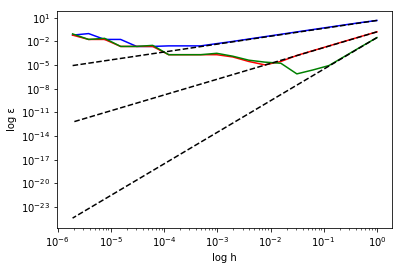

In [4]:
#Plot for Q1 cos func
#plt.semilogy(range(0,10),e_1,'b',range(0,10),e_2, 'r',range(0,10),e_3, 'g')
#plt.yticks(np.arange(0, 15))
plt.loglog(h_p,e_1/-ans,'b',h_p,e_2/-ans, 'r',h_p,e_3/-ans, 'g',h_p,e_1[0]/-ans*np.array(h_p),'k--',h_p,e_2[0]/-ans*np.array(h_p)**2,'k--',h_p,e_3[0]/-ans*np.array(h_p)**4,'k--')
plt.xlabel('log h')
plt.ylabel('log ε')

In [5]:
#Generate e for Q1 cos func
ans = np.exp(0.1)
e_4 = []
e_5 = []
e_6 = []
h_p = []
for i in range(0,20):
    h = np.float32(1/(2**i))
    h_p.append(h)
    a1 = forward_difference(np.exp,0.1,h)
    a2 = central_difference(np.exp,0.1,h)
    a3 = extrapolation_method(np.exp,0.1,h)
    e_4.append(np.abs(ans-a1))
    e_5.append(np.abs(ans-a2))
    e_6.append(np.abs(ans-a3))


Text(0, 0.5, 'log ε')

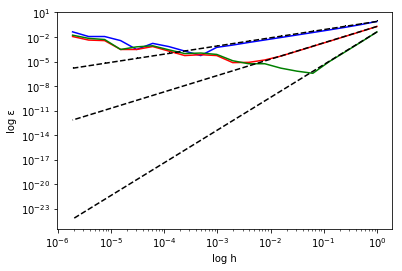

In [7]:
#Plot for Q1 exp func
plt.loglog(h_p,e_4,'b',h_p,e_5, 'r',h_p,e_6, 'g',h_p,e_4[0]*np.array(h_p),',k--',h_p,e_5[0]*np.array(h_p)**2,'k--',h_p,e_6[0]*np.array(h_p)**4,'k--')
#plt.yticks(np.arange(0, 15))
plt.xlabel('log h')
plt.ylabel('log ε')

In [8]:
#Q2 codes for integrator 
def midpoint_int(func,steps,x1=1,x0=0):
    h = np.float32((x1-x0)/steps)
    intgrl = 0
    for i in range(0,steps):
        intgrl = intgrl + func(x0+h*(i+1/2)).astype('float32')*h
    return intgrl

def trapzoid_int(func,steps,x1=1,x0=0):
    h = np.float32((x1-x0)/steps)
    intgrl = 0
    for i in range(0,steps):
        intgrl = intgrl +  (func(x0+i*h).astype('float32')+func(x0+(i+1)*h).astype('float32'))*h/2
    return intgrl

def simpson_int(func,steps,x1=1,x0=0):
    h = np.float32((x1-x0)/steps)
    intgrl = 0
    for i in range(0,steps):
        intgrl = intgrl +  1/6*h*(func(x0+i*h).astype('float32')+4*func(x0+(i+1/2)*h).astype('float32')+func(x0+(i+1)*h).astype('float32'))
    return intgrl

In [5]:
simpson_int(np.sin,100)

0.459697676332595

In [ ]:
#Generate e for Q2 
ans = -np.exp(-1)+1
h_p = []
e_7 = []
e_8 = []
e_9 = []

def exp(x):
    return np.exp(-x)
for i in range(0,25):
    #h = np.float32(1/(10**i))
    print(i)
    h = 2**i
    h_p.append(h)
    a1 = midpoint_int(exp,h)
    a2 = trapzoid_int(exp,h)
    a3 = simpson_int(exp,h)
    e_7.append(np.abs(ans-a1))
    e_8.append(np.abs(ans-a2))
    e_9.append(np.abs(ans-a3))

 

/home/server/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'log e')

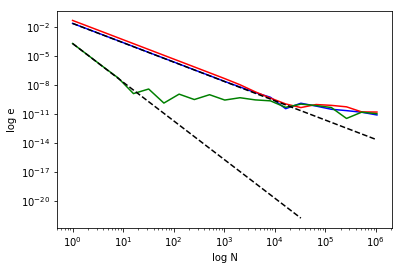

In [17]:
#Plots for Q2
#plt.semilogy(range(1,10),e_7,'b',range(1,10),e_8, 'r',range(1,10),e_9, 'g',basey=np.e)
#plt.yticks(np.arange(0, 15))
plt.loglog(h_p,e_7,'b',h_p,e_8, 'r',h_p,e_9, 'g', h_p, e_7[0]*(1/np.array(h_p)**(2)),'k--',h_p, e_9[0]*(1/np.array(h_p)**(4)),'k--')
#
plt.xlabel('log N')
plt.ylabel('log e')


In [32]:
#Q3
data = np.loadtxt("lcdm_z0.matter_pk")

In [33]:
x = np.linspace(0.0001, 100, 10000)
k = []
pk = []
for i in data:
    k.append(i[0])
    pk.append(i[1])

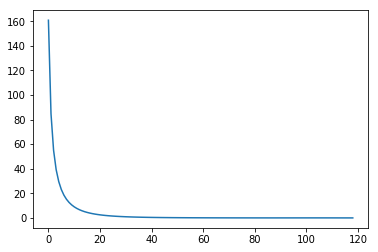

In [34]:
def intrgl(r,k,pk):
    return (k)*pk*np.sin(k*r)/(r)

f = np.interp(x,k,pk)

res = []
res2 = []
for j in range(1,120):
    it = x*f*np.sin(x*j)/j
    res.append(np.trapz(it,x))
    res2.append(np.trapz(it,x)*(j**2))


    

In [ ]:
#Plots for Q3
plt.plot(res)

Text(0.5, 0, 'r')

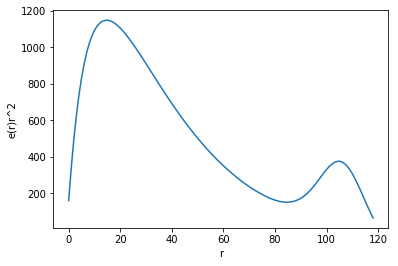

In [36]:
plt.plot(res2)
plt.ylabel('e(r)r^2')
plt.xlabel('r')

Text(0.5, 0, 'k')

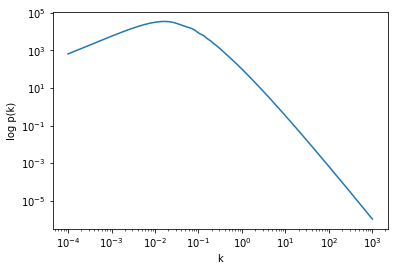

In [38]:
plt.loglog(k,pk)
plt.ylabel('log p(k)')
plt.xlabel('k')

In [ ]:
"""Junks"""

'Junks'

In [ ]:
def integrate_and_interpolate(data,r_low,r_high):
    pt = []
    for i in range(r_low,r_high):
        it = 0
        for j in range(len(data)-1):
            h = data[j+1][0] - data[j][0]
            #print(h)
            #print(h,intrgl(i,data[j][0],data[j][1]))
            it = (intrgl(i,data[j][0],data[j][1])+intrgl(i,data[j+1][0],data[j+1][1]))*h/2 +it
        it = it/(2*np.pi**2)
        pt.append(np.abs(it)*i**2)
    return pt
a = []
b = []
for i in range(1,120):
    x_ = []
    f_ = []
    for j in range(len(data)-1):
        x = data[j][0]
        f = intrgl(i,data[j][0],data[j][1])
        x_.append(x)
        f_.append(f)
    f = itp.CubicSpline(x_,f_)
    it = simpson_int(f,50000,x1=120,x0=0)
    a.append(it)
    b.append(it*(i**2))

In [ ]:
x_ = []
f_ = []
for j in range(len(data)-1):
    x = data[j][0]
    f = intrgl(20,data[j][0],data[j][1])
    x_.append(x)
    f_.append(f)
f = itp.CubicSpline(x_,f_)

In [ ]:
plt.plot(b)

In [ ]:
pt = integrate_and_interpolate(data,1,120)